In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/My Dataset/ml_olympaid/train.csv')
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,Amount,Class
0,-0.082423,-0.015885,0.018296,0.105834,0.291156,0.896142,0.416348,1.854701,-1.378885,-1.910856,0.604230,-1.075685,-0.061769,-0.433251,-2.607791,-0.326539,-0.059030,1.140944,-1.716960,-1.399815,0.146446,-1.442996,1.713633,-1.351671,-0.752007,0.174225,8.400,0
1,-0.134807,-0.038678,0.186766,0.061890,1.691469,-0.583866,0.022343,-1.261033,0.060611,1.567038,-0.744162,0.565000,-0.599505,NaN,-0.402509,0.954646,-0.169216,1.949623,0.881305,0.270719,0.200727,0.378079,-0.707367,0.005269,-0.234881,-0.129527,4.200,0
2,0.050357,0.043518,-0.084152,0.121125,1.782521,-0.614403,0.215234,-2.049707,0.018533,0.315355,-0.941150,-0.774718,3.003092,0.273515,1.689802,-1.662092,0.282405,1.831009,1.190881,1.210408,0.754548,1.155251,-0.154011,0.328052,-0.239821,-0.162559,146.958,0
3,0.104938,0.105659,0.441895,-0.272794,-2.273324,2.845803,-1.722852,1.520203,-2.716840,1.817746,1.575395,-0.252826,0.439894,-1.054180,NaN,-0.940693,0.331142,0.482808,1.097569,-0.682473,0.733577,NaN,0.557412,-0.793795,-0.459385,-0.893781,32.256,0
4,NaN,-0.194533,-0.022850,1.017750,0.062345,0.166484,NaN,1.358151,0.234661,1.516270,-1.218913,-0.112761,0.364553,-0.430106,2.085072,0.963968,0.776721,-0.470592,0.236036,1.172562,-1.397078,-1.231025,0.268283,-0.030406,0.258374,0.352570,982.800,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   col_0   216575 non-null  float64
 1   col_1   216487 non-null  float64
 2   col_2   216589 non-null  float64
 3   col_3   216329 non-null  float64
 4   col_4   216404 non-null  float64
 5   col_5   216432 non-null  float64
 6   col_6   216591 non-null  float64
 7   col_7   216303 non-null  float64
 8   col_8   216597 non-null  float64
 9   col_9   216570 non-null  float64
 10  col_10  216486 non-null  float64
 11  col_11  216626 non-null  float64
 12  col_12  216484 non-null  float64
 13  col_13  216509 non-null  float64
 14  col_14  216447 non-null  float64
 15  col_15  216511 non-null  float64
 16  col_16  216601 non-null  float64
 17  col_17  216478 non-null  float64
 18  col_18  216480 non-null  float64
 19  col_19  216395 non-null  float64
 20  col_20  216418 non-null  float64
 21  col_21  21

In [4]:
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i, t in enumerate(types):
        if 'int' in str(t):
            if (df[cols[i]].min() > np.iinfo(np.int8).min) and (df[cols[i]].max() < np.iinfo(np.int8).max):
                df[cols[i]] = df[cols[i]].astype(np.int8)
                
            elif (df[cols[i]].min() > np.iinfo(np.int16).min) and (df[cols[i]].max() < np.iinfo(np.int16).max):
                df[cols[i]] = df[cols[i]].astype(np.int16)
                
            elif (df[cols[i]].min() > np.iinfo(np.int32).min) and (df[cols[i]].max() < np.iinfo(np.int32).max):
                df[cols[i]] = df[cols[i]].astype(np.int32)
            
            else:
                df[cols[i]] = df[cols[i]].asypes(np.int64)
        elif 'float' in str(t):
            if (df[cols[i]].min() > np.finfo(np.float16).min) and (df[cols[i]].max() < np.finfo(np.float16).max):
                df[cols[i]] = df[cols[i]].astype(np.float16)
                
            elif (df[cols[i]].min() > np.finfo(np.float32).min) and (df[cols[i]].max() < np.finfo(np.float32).max):
                df[cols[i]] = df[cols[i]].astype(np.float32)
            
            else:
                df[cols[i]] = df[cols[i]].asypes(np.float64)
        elif t == object:
            if cols[i] == 'date':
                #df[cols[i]] = pd.to_datetime(df[cols[i]], format = '%Y-%m-%d')
                pass
            else:
                df[cols[i]] = df[cols[i]].astypes('category')
    return df

In [5]:
df = downcast(df)
print('DataFrame Size: {} mb'.format(np.round(df.memory_usage().sum()/(1024*1024),1)))

DataFrame Size: 12.4 mb


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   col_0   216575 non-null  float16
 1   col_1   216487 non-null  float16
 2   col_2   216589 non-null  float16
 3   col_3   216329 non-null  float16
 4   col_4   216404 non-null  float16
 5   col_5   216432 non-null  float16
 6   col_6   216591 non-null  float16
 7   col_7   216303 non-null  float16
 8   col_8   216597 non-null  float16
 9   col_9   216570 non-null  float16
 10  col_10  216486 non-null  float16
 11  col_11  216626 non-null  float16
 12  col_12  216484 non-null  float16
 13  col_13  216509 non-null  float16
 14  col_14  216447 non-null  float16
 15  col_15  216511 non-null  float16
 16  col_16  216601 non-null  float16
 17  col_17  216478 non-null  float16
 18  col_18  216480 non-null  float16
 19  col_19  216395 non-null  float16
 20  col_20  216418 non-null  float16
 21  col_21  21

In [7]:
df.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,Amount,Class
count,216575.000000,216487.000000,216589.000000,216329.000000,216404.000000,216432.000000,216591.000000,216303.000000,216597.000000,216570.000000,216486.000000,216626.000000,216484.000000,216509.000000,216447.000000,216511.000000,216601.000000,216478.000000,216480.000000,216395.000000,216418.000000,216694.000000,216508.000000,216532.000000,216550.000000,216478.000000,216577.000000,227845.000000
mean,0.000230,-0.000124,0.000332,-0.000525,-0.000527,-0.000159,-0.000102,-0.000078,-0.000228,-0.000133,-0.000058,0.000113,-0.000447,0.000332,-0.000578,0.000783,0.000778,-0.000570,-0.000038,-0.000328,-0.000467,-0.000228,0.000265,0.000632,0.000843,-0.000038,371.632629,0.001694
std,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1066.242920,0.041125
min,-12.531250,-24.140625,-42.593750,-18.390625,-8.906250,-12.335938,-10.312500,-8.445312,-6.867188,-9.476562,-21.218750,-5.710938,-6.183594,-8.914062,-8.195312,-6.496094,-5.257812,-13.312500,-11.859375,-4.933594,-9.148438,-23.468750,-35.125000,-29.453125,-20.750000,-25.984375,0.000000,0.000000
25%,-0.201538,-0.242554,-0.234009,-0.378418,-0.666504,-0.552734,-0.422852,-0.625488,-0.466797,-0.632812,-0.568848,-0.612305,-0.671387,-0.590820,-0.604004,-0.646973,-0.668457,-0.609863,-0.613281,-0.695801,-0.550293,-0.636719,-0.526367,-0.626465,-0.351562,-0.316406,23.226000,0.000000
50%,-0.081177,-0.087952,-0.046631,-0.101929,-0.067932,-0.165649,0.093323,-0.011848,0.089355,0.026459,0.004856,0.063293,-0.004803,0.021561,0.030167,0.031952,-0.004517,0.010513,-0.025696,-0.112732,0.039337,-0.039551,0.038666,-0.049469,0.007526,-0.041077,92.400002,0.000000
75%,0.038147,0.059174,0.220825,0.218994,0.562988,0.305420,0.607910,0.550781,0.536621,0.674805,0.588379,0.688965,0.645020,0.611328,0.615723,0.674805,0.639160,0.580566,0.583008,0.608398,0.584473,0.593262,0.597168,0.575684,0.371826,0.214966,323.735992,0.000000
max,82.812500,103.562500,60.468750,65.687500,10.093750,23.187500,16.781250,18.515625,11.515625,12.585938,21.359375,22.937500,6.742188,23.703125,8.648438,7.636719,6.031250,30.484375,32.718750,8.671875,12.531250,20.250000,42.812500,15.796875,29.859375,116.625000,107902.875000,1.000000


In [8]:
df_summary = pd.DataFrame(df.describe().T)
df_summary = df_summary.reset_index()
df_summary

,index,count,mean,std,min,25%,50%,75%,max
0,col_0,216575.0,0.000230,0.000000,-12.531250,-0.201538,-0.081177,0.038147,82.812500
1,col_1,216487.0,-0.000124,0.000000,-24.140625,-0.242554,-0.087952,0.059174,103.562500
2,col_2,216589.0,0.000332,0.000000,-42.593750,-0.234009,-0.046631,0.220825,60.468750
3,col_3,216329.0,-0.000525,0.000000,-18.390625,-0.378418,-0.101929,0.218994,65.687500
4,col_4,216404.0,-0.000527,0.000000,-8.906250,-0.666504,-0.067932,0.562988,10.093750
5,col_5,216432.0,-0.000159,0.000000,-12.335938,-0.552734,-0.165649,0.305420,23.187500
6,col_6,216591.0,-0.000102,0.000000,-10.312500,-0.422852,0.093323,0.607910,16.781250
7,col_7,216303.0,-0.000078,0.000000,-8.445312,-0.625488,-0.011848,0.550781,18.515625
8,col_8,216597.0,-0.000228,0.000000,-6.867188,-0.466797,0.089355,0.536621,11.515625
9,col_9,216570.0,-0.000133,0.000000,-9.476562,-0.632812,0.026459,0.674805,12.585938


### 1. Histogram

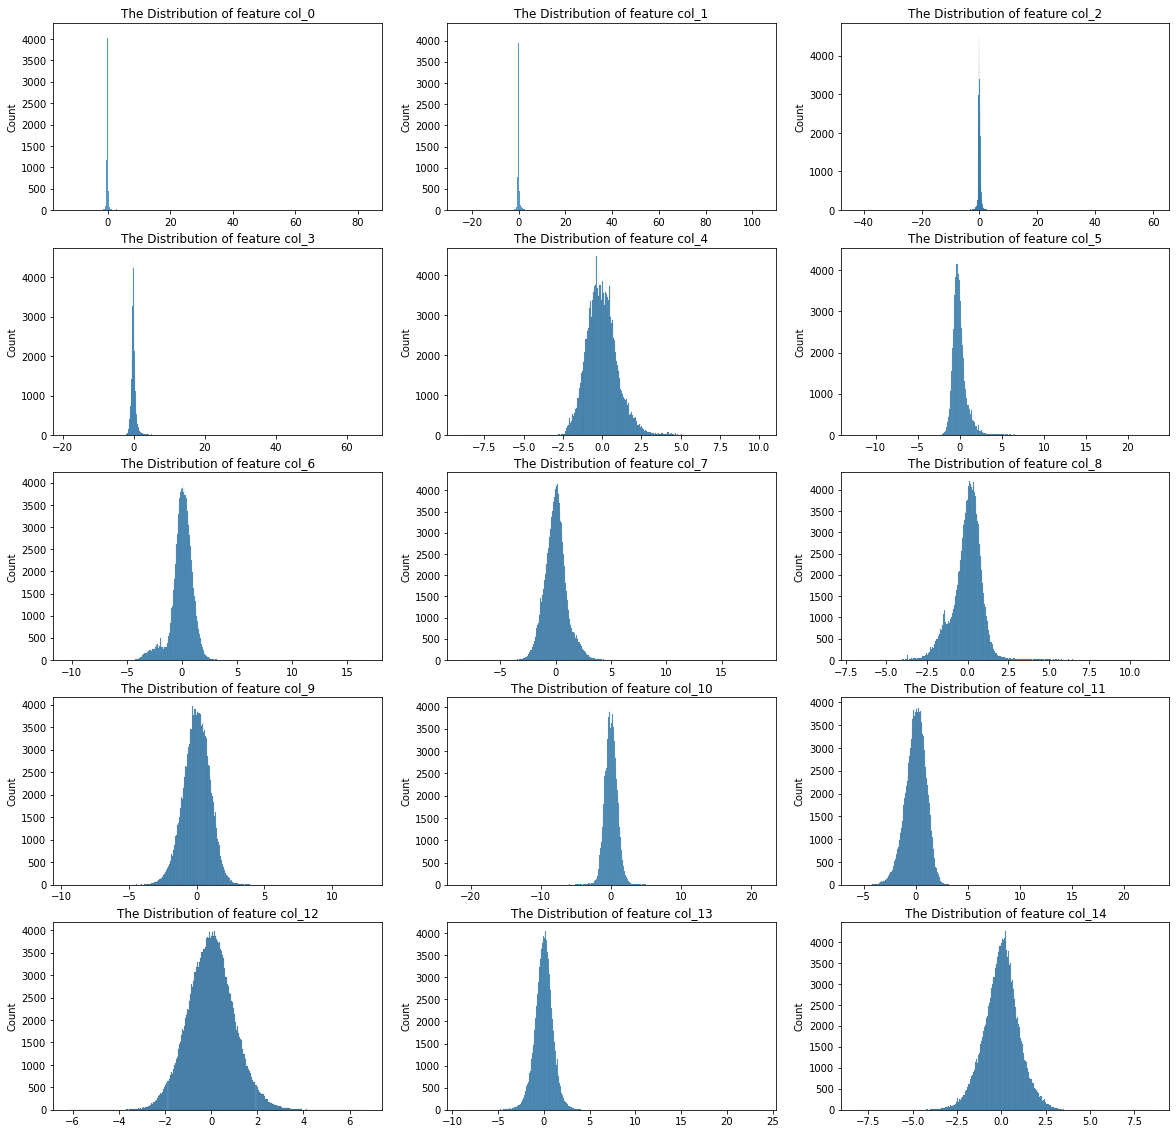

CPU times: user 1min 29s, sys: 1.05 s, total: 1min 30s
Wall time: 1min 30s


In [15]:
%%time
#First 15 columns

f, ax = plt.subplots(5,3, figsize = (20, 20))
k = 0

df_1 = df.iloc[:, :15]
for i in range(0,5):
    for j in range(0,3):
        sns.histplot(data = df_1.iloc[:,k], ax = ax[i,j])
        ax[i,j].set_title(f"The Distribution of feature {df.columns[k]}")
        ax[i,j].set(xlabel=None)
        k += 1
plt.show()
f.savefig('/content/drive/MyDrive/DS_Model/figure/histogram1.png')

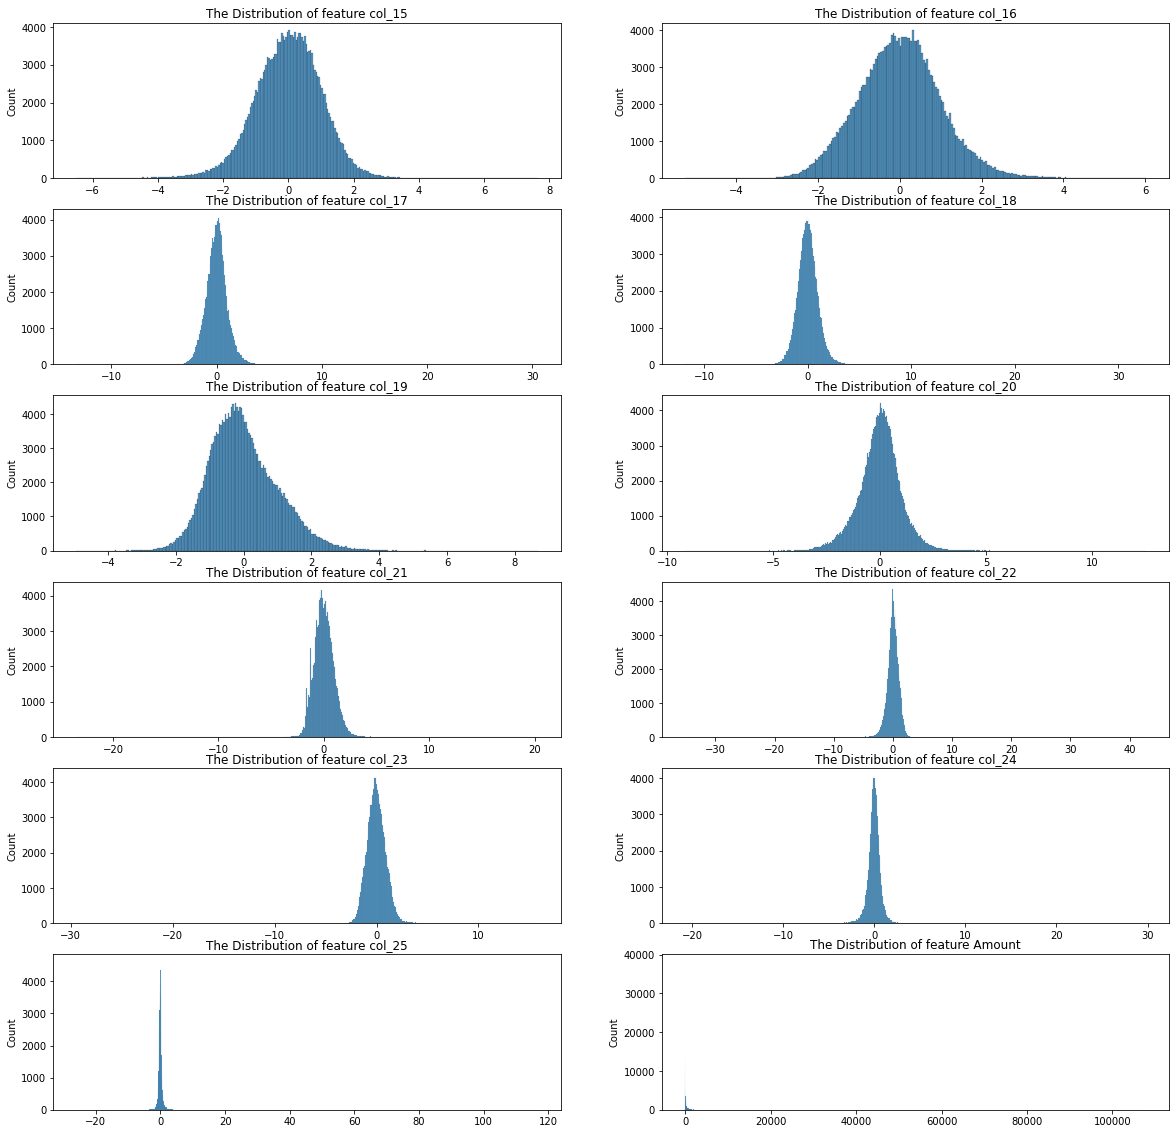

CPU times: user 1min 2s, sys: 525 ms, total: 1min 2s
Wall time: 1min 2s


In [16]:
%%time
#15th columns - 26th columns

f, ax = plt.subplots(6, 2, figsize = (20, 20))
k = 0

df_2 = df.iloc[:, 15:27]
for i in range(0,6):
    for j in range(0,2):
        sns.histplot(data = df_2.iloc[:,k], ax = ax[i,j])
        ax[i,j].set_title(f"The Distribution of feature {df_2.columns[k]}")
        ax[i,j].set(xlabel=None)
        k += 1
plt.show()
f.savefig('/content/drive/MyDrive/DS_Model/figure/histogram2.png')

### 2. Boxplot

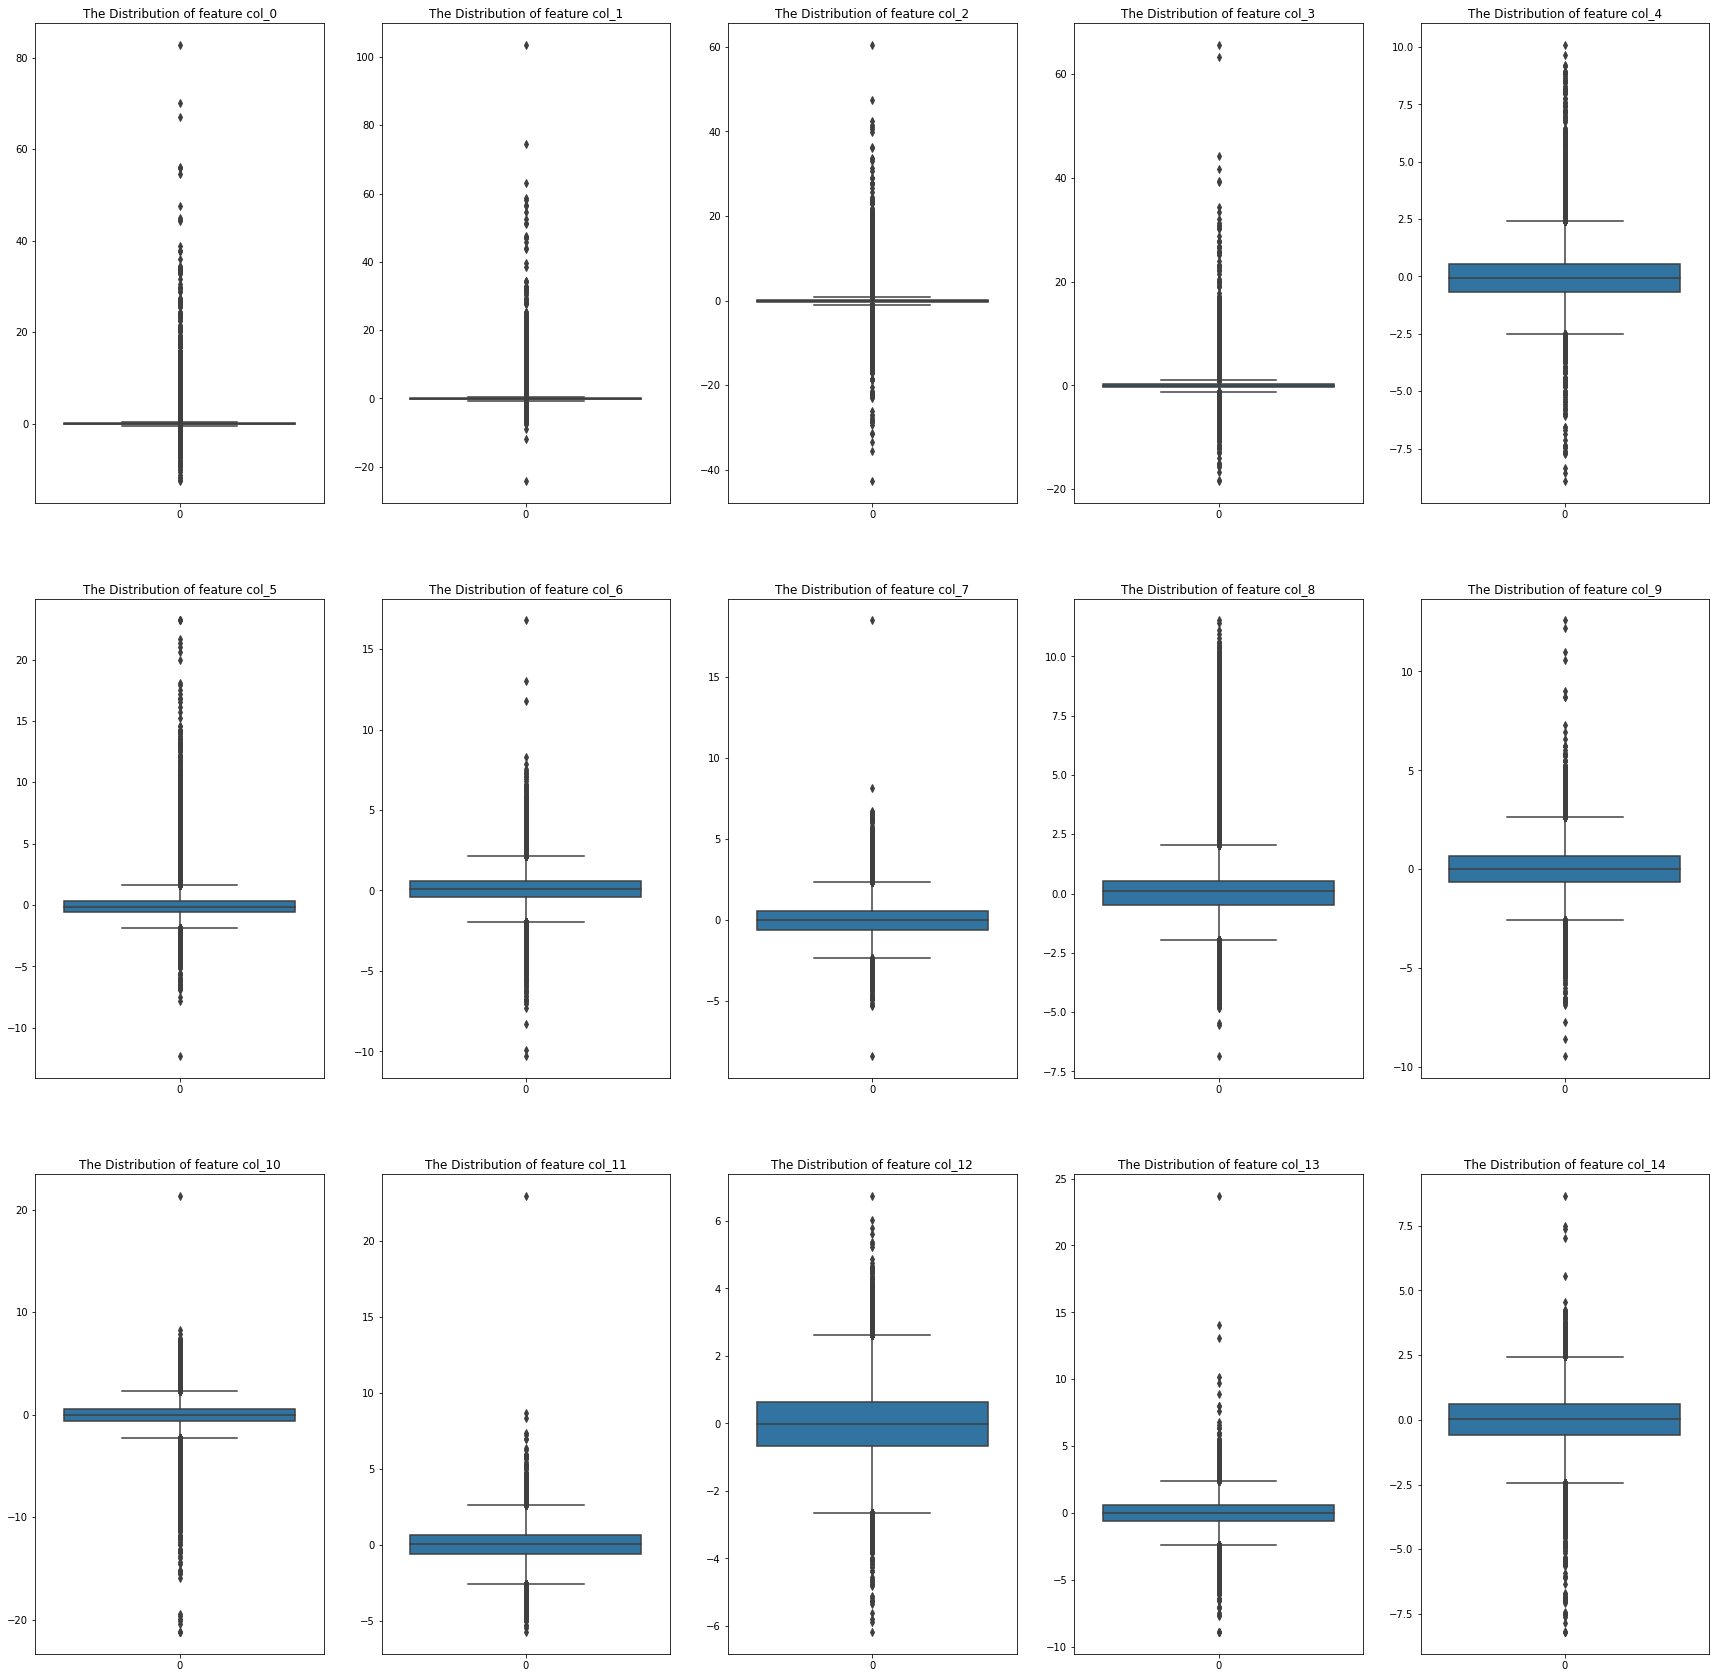

CPU times: user 3.79 s, sys: 42.2 ms, total: 3.83 s
Wall time: 3.83 s


In [17]:
%%time

f, ax = plt.subplots(3,5, figsize = (30, 30))
k = 0

for i in range(0,3):
    for j in range(0,5):
        sns.boxplot(data = df_1.iloc[:,k], ax = ax[i,j])
        ax[i,j].set_title(f"The Distribution of feature {df_1.columns[k]}")
        k += 1
plt.show()
f.savefig('/content/drive/MyDrive/DS_Model/figure/boxplot1.png')

# 3. Heatmap


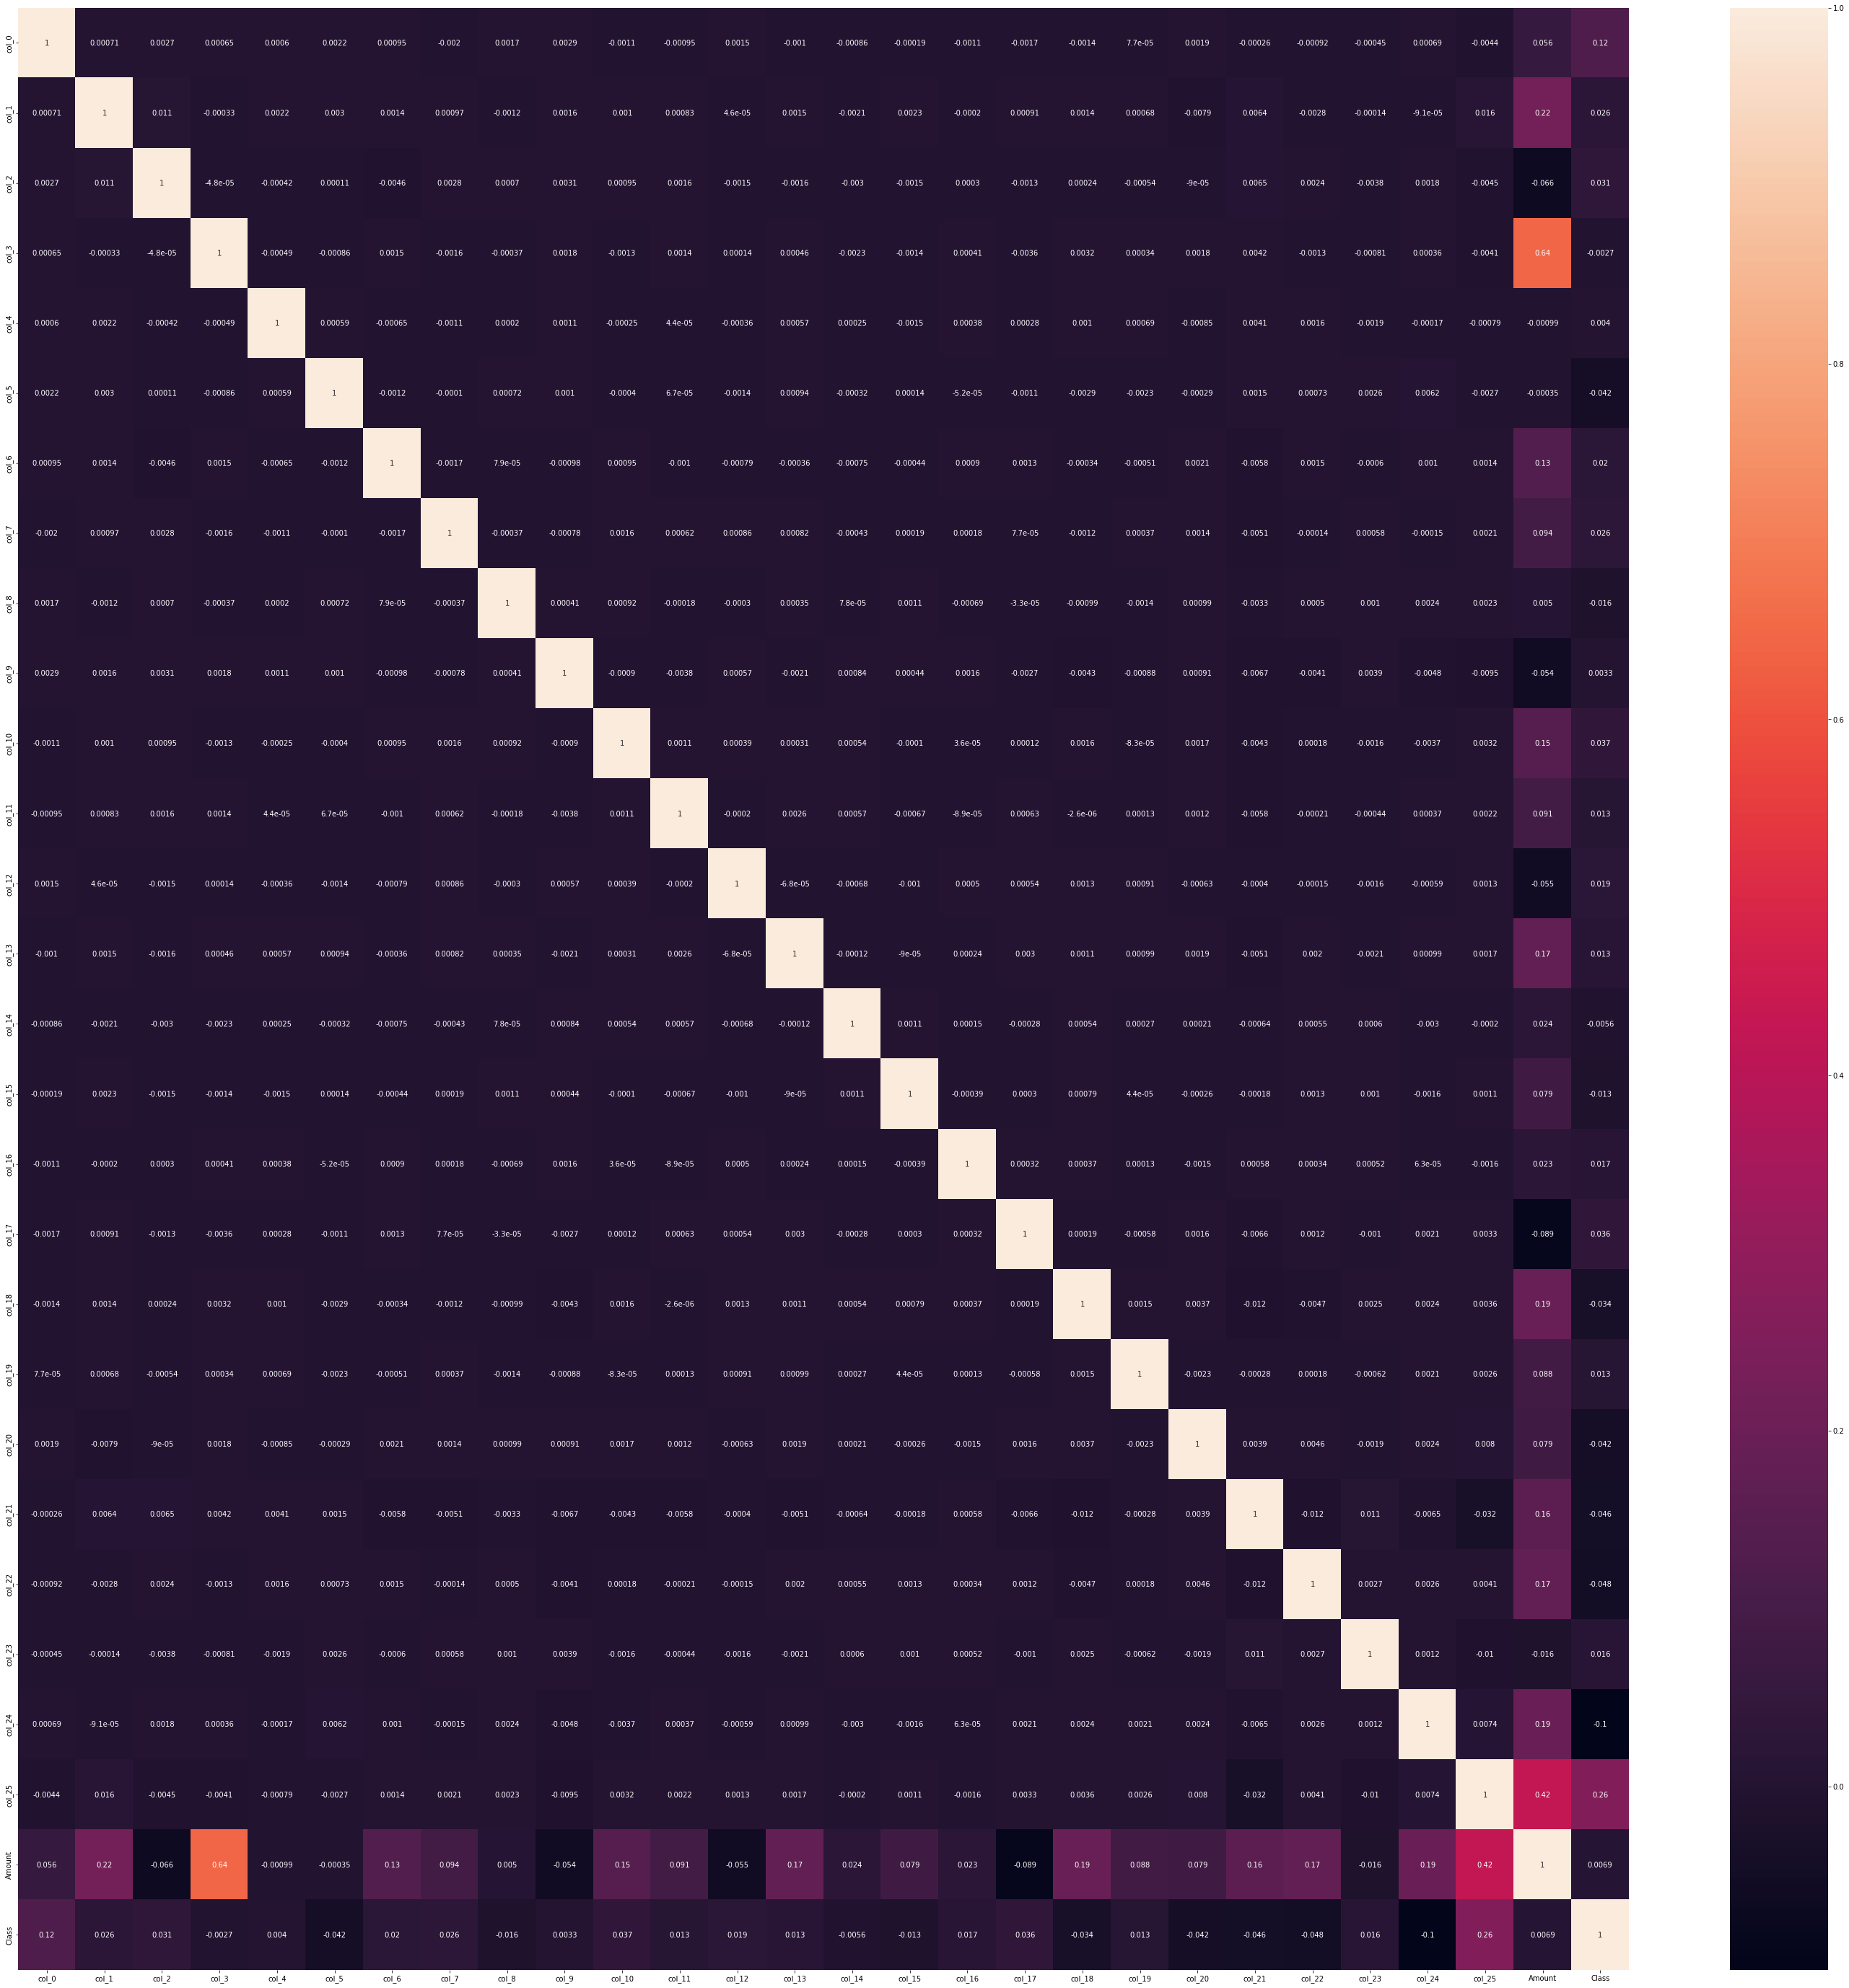

CPU times: user 6.67 s, sys: 422 ms, total: 7.1 s
Wall time: 6.91 s


In [18]:
%%time
plt.figure(figsize = (50, 50))
sns.heatmap(df.corr(), annot = True)
plt.show()

Observation:

It's obvious that Amount have the high correlation with other columns. <br>
And col_25 is 26% correlation with column class. <br>

# 4. Outlier Analysis

In [19]:
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,Amount,Class
0,-0.082397,-0.015884,0.018295,0.105835,0.291260,0.895996,0.416260,1.854492,-1.378906,-1.911133,0.604004,-1.076172,-0.061768,-0.433350,-2.607422,-0.326660,-0.059021,1.140625,-1.716797,-1.399414,0.146484,-1.443359,1.713867,-1.351562,-0.751953,0.174194,8.400000,0
1,-0.134766,-0.038666,0.186768,0.061890,1.691406,-0.583984,0.022339,-1.260742,0.060608,1.567383,-0.744141,0.564941,-0.599609,NaN,-0.402588,0.954590,-0.169189,1.949219,0.881348,0.270752,0.200684,0.378174,-0.707520,0.005268,-0.234863,-0.129517,4.200000,0
2,0.050354,0.043518,-0.084167,0.121155,1.782227,-0.614258,0.215210,-2.048828,0.018539,0.315430,-0.940918,-0.774902,3.003906,0.273438,1.689453,-1.662109,0.282471,1.831055,1.190430,1.209961,0.754395,1.155273,-0.154053,0.328125,-0.239868,-0.162598,146.957993,0
3,0.104919,0.105652,0.441895,-0.272705,-2.273438,2.845703,-1.722656,1.520508,-2.716797,1.817383,1.575195,-0.252930,0.439941,-1.053711,NaN,-0.940918,0.331055,0.482910,1.097656,-0.682617,0.733398,NaN,0.557617,-0.793945,-0.459473,-0.893555,32.256001,0
4,NaN,-0.194580,-0.022858,1.017578,0.062347,0.166504,NaN,1.358398,0.234619,1.516602,-1.218750,-0.112732,0.364502,-0.430176,2.085938,0.963867,0.776855,-0.470703,0.236084,1.172852,-1.397461,-1.231445,0.268311,-0.030411,0.258301,0.352539,982.799988,0


In [20]:
df_summary

,index,count,mean,std,min,25%,50%,75%,max
0,col_0,216575.0,0.000230,0.000000,-12.531250,-0.201538,-0.081177,0.038147,82.812500
1,col_1,216487.0,-0.000124,0.000000,-24.140625,-0.242554,-0.087952,0.059174,103.562500
2,col_2,216589.0,0.000332,0.000000,-42.593750,-0.234009,-0.046631,0.220825,60.468750
3,col_3,216329.0,-0.000525,0.000000,-18.390625,-0.378418,-0.101929,0.218994,65.687500
4,col_4,216404.0,-0.000527,0.000000,-8.906250,-0.666504,-0.067932,0.562988,10.093750
5,col_5,216432.0,-0.000159,0.000000,-12.335938,-0.552734,-0.165649,0.305420,23.187500
6,col_6,216591.0,-0.000102,0.000000,-10.312500,-0.422852,0.093323,0.607910,16.781250
7,col_7,216303.0,-0.000078,0.000000,-8.445312,-0.625488,-0.011848,0.550781,18.515625
8,col_8,216597.0,-0.000228,0.000000,-6.867188,-0.466797,0.089355,0.536621,11.515625
9,col_9,216570.0,-0.000133,0.000000,-9.476562,-0.632812,0.026459,0.674805,12.585938


In [21]:
df_outlier = pd.DataFrame(columns = {'column', 'min_outlier_count%', 'min', 'within_range_count%', 'max_outlier_count%', 'max', 'null_count%'})
df_outlier = df_outlier[['column', 'min_outlier_count%', 'min', 'within_range_count%', 'max_outlier_count%',  'max', 'null_count%']]
df_outlier

,column,min_outlier_count%,min,within_range_count%,max_outlier_count%,max,null_count%


In [22]:
%%time
k = 0
for i in df.columns:
    # Calculate the Interquatile Range
    q3 = df_summary[df_summary['index'] == i]['75%']
    q1 = df_summary[df_summary['index'] == i]['25%']

    iqr = np.round(q3[k], 2) - np.round(q1[k], 2)
    min_outlier = np.round(q1[k], 2) - (1.5 * iqr)
    max_outlier = np.round(q3[k], 2) + (1.5 * iqr)

    # Min & Max
    min = df_summary[df_summary['index'] == i]['min']
    max = df_summary[df_summary['index'] == i]['max']
    min = np.round((min[k]), 2)
    min = min.astype('float')
    max = np.round((max[k]), 2)
    max = max.astype('float')

    # Min Outlier count & Max Outlier count
    min_outlier_df = df[df[i] <= min_outlier]
    min_outlier_count = min_outlier_df.shape[0]
    min_outlier_count_perc = np.round((min_outlier_count/227845)*100,2)
    max_outlier_df = df[df[i] >= max_outlier]
    max_outlier_count = max_outlier_df.shape[0]
    max_outlier_count_perc = np.round((max_outlier_count/227845)*100,2)

    # Within Range count
    within_range_df = df[(df[i] > min_outlier) & (df[i] < max_outlier)]
    within_range_count = within_range_df.shape[0]
    within_range_count_perc = np.round((within_range_count/227845)*100,2)
    

    # Null Count
    null_count = df[i].isnull().sum()
    null_count_perc = np.round((null_count/227845)*100,2)

    # Insert into df_outlier
    new_data = {'column': i, 'min_outlier_count%': min_outlier_count_perc, 'min': min, 'within_range_count%':within_range_count_perc , 'max_outlier_count%':max_outlier_count_perc, 'max': max, 'null_count%': null_count_perc}
    df_outlier = df_outlier.append(new_data, ignore_index = True)
    #print(i, min_outlier_count, max_outlier_count, within_range_count, null_count)
    k +=1

CPU times: user 2.01 s, sys: 33 ms, total: 2.05 s
Wall time: 2.05 s


In [23]:
df_outlier

,column,min_outlier_count%,min,within_range_count%,max_outlier_count%,max,null_count%
0,col_0,3.03,-12.53,87.44,4.58,82.81,4.95
1,col_1,3.19,-24.14,84.86,6.96,103.56,4.98
2,col_2,3.33,-42.59,88.43,3.30,60.47,4.94
3,col_3,1.88,-18.39,87.99,5.07,65.69,5.05
4,col_4,0.11,-8.91,93.16,1.71,10.09,5.02
5,col_5,0.27,-12.34,89.79,4.93,23.19,5.01
6,col_6,5.41,-10.31,89.07,0.58,16.78,4.94
7,col_7,0.67,-8.45,92.23,2.04,18.52,5.07
8,col_8,2.78,-6.87,90.94,1.34,11.52,4.94
9,col_9,0.86,-9.48,93.82,0.38,12.59,4.95


In [24]:
df_outlier.to_csv('/content/drive/MyDrive/My Dataset/ml_olympaid/df_outlier.csv', index = False)